In [8]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.random import random_circuit
from qiskit.circuit import *

# Create a quantum circuit with a parameterized gate
theta = Parameter('theta')
qc = QuantumCircuit(1)
qc.rx(theta, 0)  # RX gate with a parameter theta

# Create a function to embed classical data into the quantum circuit
def embed_data(circuit, data):
    return circuit.bind_parameters({theta: data})

# Define a random dataset
data_point = 0.8

# Embed the data into the quantum circuit
embedded_circuit = embed_data(qc, data_point)

# Display the original and embedded circuits
print("Original Quantum Circuit:")
print(qc)

print("\nEmbedded Quantum Circuit:")
print(embedded_circuit)

Original Quantum Circuit:
   ┌───────────┐
q: ┤ Rx(theta) ├
   └───────────┘

Embedded Quantum Circuit:
   ┌─────────┐
q: ┤ Rx(0.8) ├
   └─────────┘


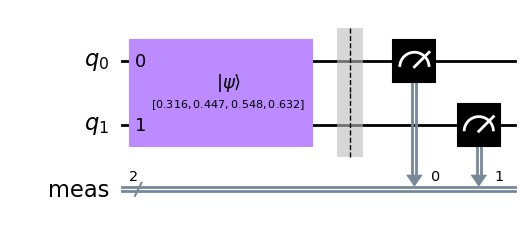

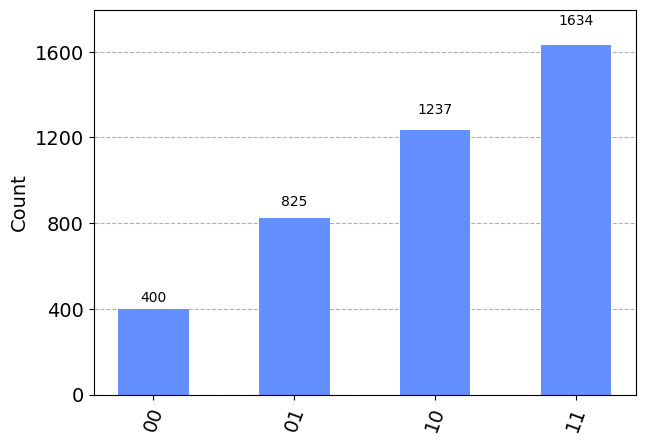

In [36]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from math import sqrt

# Define the amplitudes
alpha = [1/sqrt(10), sqrt(2)/sqrt(10), sqrt(3)/sqrt(10), sqrt(4)/sqrt(10)]

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Apply the Initialize gate to create a superposition with specified amplitudes
qc.initialize(alpha, [0, 1])

# Measure qubits
qc.measure_all()

# Draw the circuit
display(qc.draw('mpl'))

# Simulate the circuit and plot the histogram
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=4096)  # You can adjust the number of shots as needed
result = job.result()

# Get the counts from the result
counts = result.get_counts(qc)

# Plot the histogram
plot_histogram(counts)